### Importação dos dados



In [1]:
import pandas as pd

caminho_base = "D:\\Estudos\\ONE-Data_Science\\base_dados\\"

loja = pd.read_csv(caminho_base + "loja_1.csv")
loja2 = pd.read_csv(caminho_base + "loja_2.csv")
loja3 = pd.read_csv(caminho_base + "loja_3.csv")
loja4 = pd.read_csv(caminho_base + "loja_4.csv")


#1. Análise do faturamento


In [2]:
# Calculando o faturamento total por loja
faturamento_loja = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Mostrando os resultados formatados
print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


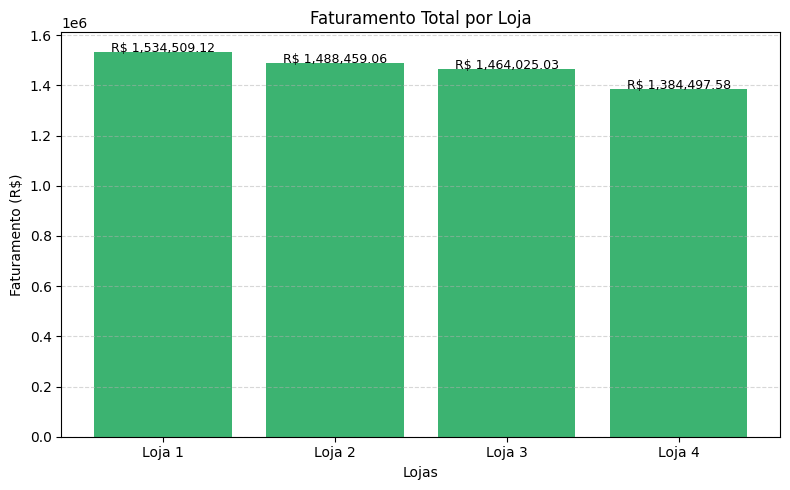

In [3]:
import matplotlib.pyplot as plt

# Gráfico de barras do faturamento
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='mediumseagreen')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 100, f"R$ {valor:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


# 3. Média de Avaliação das Lojas

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
